In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.manifold import TSNE
import os


In [2]:
file_path = Path("myopia.csv")
df = pd.read_csv(file_path)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
labels = df["MYOPIC"]

In [4]:
X = df.drop(columns= ["MYOPIC"])
X.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [5]:
# Standarize data with StandarScaler
scalar = StandardScaler()
scaled_X = scalar.fit_transform(X)
print(scaled_X[0:5])

[[-0.42021911 -1.3639169  -0.89286146  0.48378402 -0.28144315 -1.0197916
   4.1506609   1.69744958 -0.68931054 -0.67299591  0.18405806  0.49830393
   0.98713773  1.0032415 ]
 [-0.42021911 -0.30861224 -0.1718398   0.53591028 -0.96799728 -0.13076253
  -0.99889822 -0.91206246 -0.36187479 -0.22140908 -0.34093217 -0.87508755
   0.98713773  1.0032415 ]
 [-0.42021911  0.60438629 -0.00997682 -0.5066285  -0.17781207  0.21580879
   0.25709181 -0.91206246 -0.03443904 -0.67299591  0.18405806 -0.75023378
  -1.01302987 -0.99676897]
 [-0.42021911 -0.4413248  -0.43670267  1.23093648  0.4569273  -0.97458715
   0.75948782  2.6760166  -0.68931054 -0.67299591 -0.86592239  0.68558458
  -1.01302987  1.0032415 ]
 [-1.82397807 -0.16630592  1.16720365  0.42296952 -0.56642745  1.18017813
   0.25709181 -0.91206246 -0.68931054 -0.67299591 -0.86592239 -1.37450264
   0.98713773 -0.99676897]]


In [6]:
# Initialize PCA model
pca = PCA(n_components=0.9)

# Get two principal components for the iris data.
pca_X = pca.fit_transform(scaled_X)

df_pca = pd.DataFrame(data=pca_X)
df_pca.head()

,0,1,2,3,4,5,6,7,8,9
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


In [7]:
df_pca.shape

(618, 10)

In [8]:
# Fetch the explained variance (above 0.80)
pca.explained_variance_ratio_.sum()

0.9187361702915187

In [16]:
# Run t-SNE
tsne = TSNE(learning_rate=50, perplexity=50)
tsne_features = tsne.fit_transform(df_pca)

C:\Users\yamee\Anaconda3\envs\PythonData38\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [17]:
tsne_features.shape

(618, 2)

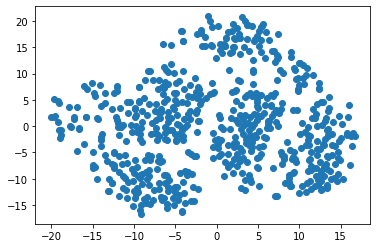

In [18]:
plt.scatter(tsne_features[:,0], tsne_features[:,1] )
plt.show()

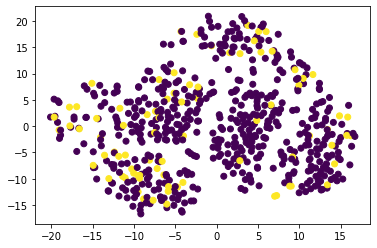

In [19]:
plt.scatter(tsne_features[:,0], tsne_features[:,1], c=labels)
plt.show()

In [20]:
os.environ["OMP_NUM_THREADS"] = '1'

In [21]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(tsne_features)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow

C:\Users\yamee\Anaconda3\envs\PythonData38\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,97554.835938
1,2,58107.949219
2,3,32986.746094
3,4,23369.986328
4,5,18716.718750
5,6,15400.032227
6,7,12179.681641
7,8,10775.914062
8,9,9448.000977
9,10,8262.586914


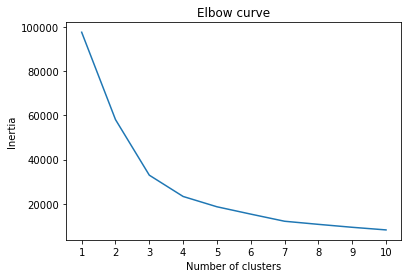

In [22]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve')
plt.show()